<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-AI_programming/linear_regression-merged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
1. 데이터 정의 or 불러오기
2. linear 함수와 손실함수 선언하기
3. paramters 초기화하기
4. (필요시) 미분 함수 정의하기
5. training loop 선언<br>
: epoch만큼 순회하며
  - prediction하고 loss 계산
  - gradient 계산
  - update parameters
6. 결과 확인


In [98]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Math, Latex
from torch.nn import Module, init, Linear, Parameter, MSELoss, ReLU
from torch import optim

In [99]:
for c in [torch, np]:
  print(c.__version__)

2.2.1+cu121
1.25.2


# Data 생성부
- input
- output: x (tensor), y (tensor) = y_ideal + noise

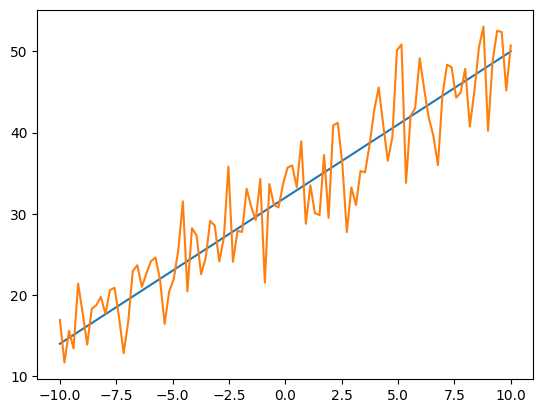

In [100]:
x = np.linspace(-10, 10, 100)
y_ideal = 1.8*x + 32
y_noise = y_ideal + 4 * np.random.randn((100))

plt.plot(x, y_ideal, x, y_noise)

In [101]:
x = torch.tensor(x).float()
y = torch.tensor(y_noise).float()
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# Model and Loss

### Without AutoGrad

In [102]:
def linear(x, w, b):
  y = w*x + b
  return y

def mse(pred, label):
  mse = ((pred - label)**2).mean()
  return mse

### With AutoGrad

In [103]:
def ds_linear_model (x, w, b):
  ret_v = w * x + b
  return ret_v

def loss_func(pred, label):
  mse = ((pred - label)**2).mean()
  return mse

### With Module

In [104]:
class DsLinearModel(Module):
  def __init__(self,
               n_in_f, # input vector의 차원 수
               n_out_f # output vector의 차원 수
               ):
    super().__init__()

    init_w = torch.ones(1,1)
    init_b = torch.zeros(1)
    self.l0 = Linear(n_in_f, n_out_f)
    self.l0.weight = Parameter(init_w)
    self.l0.bias = Parameter(init_b)

  def forward(self, x):
    y = self.l0(x)
    return y

# Weight Initialization

In [105]:
# Without Autograd
w1 = torch.ones(())
b1 = torch.zeros(())
print(w1, b1)

# With Autograd
w2 = torch.ones(())
b2 = torch.zeros(())
print(w2, b2)

tensor(1.) tensor(0.)
tensor(1.) tensor(0.)


In [106]:
pred1 = linear(x, w1, b1)
pred1

tensor([[-10.0000],
        [ -9.7980],
        [ -9.5960],
        [ -9.3939],
        [ -9.1919],
        [ -8.9899],
        [ -8.7879],
        [ -8.5859],
        [ -8.3838],
        [ -8.1818],
        [ -7.9798],
        [ -7.7778],
        [ -7.5758],
        [ -7.3737],
        [ -7.1717],
        [ -6.9697],
        [ -6.7677],
        [ -6.5657],
        [ -6.3636],
        [ -6.1616],
        [ -5.9596],
        [ -5.7576],
        [ -5.5556],
        [ -5.3535],
        [ -5.1515],
        [ -4.9495],
        [ -4.7475],
        [ -4.5455],
        [ -4.3434],
        [ -4.1414],
        [ -3.9394],
        [ -3.7374],
        [ -3.5354],
        [ -3.3333],
        [ -3.1313],
        [ -2.9293],
        [ -2.7273],
        [ -2.5253],
        [ -2.3232],
        [ -2.1212],
        [ -1.9192],
        [ -1.7172],
        [ -1.5152],
        [ -1.3131],
        [ -1.1111],
        [ -0.9091],
        [ -0.7071],
        [ -0.5051],
        [ -0.3030],
        [ -0.1010],


In [107]:
pred2 = ds_linear_model(x, w2, b2)
pred2

tensor([[-10.0000],
        [ -9.7980],
        [ -9.5960],
        [ -9.3939],
        [ -9.1919],
        [ -8.9899],
        [ -8.7879],
        [ -8.5859],
        [ -8.3838],
        [ -8.1818],
        [ -7.9798],
        [ -7.7778],
        [ -7.5758],
        [ -7.3737],
        [ -7.1717],
        [ -6.9697],
        [ -6.7677],
        [ -6.5657],
        [ -6.3636],
        [ -6.1616],
        [ -5.9596],
        [ -5.7576],
        [ -5.5556],
        [ -5.3535],
        [ -5.1515],
        [ -4.9495],
        [ -4.7475],
        [ -4.5455],
        [ -4.3434],
        [ -4.1414],
        [ -3.9394],
        [ -3.7374],
        [ -3.5354],
        [ -3.3333],
        [ -3.1313],
        [ -2.9293],
        [ -2.7273],
        [ -2.5253],
        [ -2.3232],
        [ -2.1212],
        [ -1.9192],
        [ -1.7172],
        [ -1.5152],
        [ -1.3131],
        [ -1.1111],
        [ -0.9091],
        [ -0.7071],
        [ -0.5051],
        [ -0.3030],
        [ -0.1010],


In [108]:
# Without Autograd
print(mse(pred1, pred1))
print(mse(pred1+1, pred1))
print()

# With Autograd
print(loss_func(pred2, pred2))
print(loss_func(pred2+1, pred2))

tensor(0.)
tensor(1.)

tensor(0.)
tensor(1.)


# Setting Gradient Descent func.
(for without autograd)

In [109]:
def gd_w(x, w, b, delta):
  gd = (mse(linear(x, w+delta, b), y_noise) - mse(linear(x, w-delta, b), y_noise)) / 2 * delta
  return gd

def gd_b(x, w, b, delta):
  gd = (mse(linear(x, w, b+delta), y_noise) - mse(linear(x, w, b-delta), y_noise)) / 2 * delta
  return gd

In [110]:
loss = mse(pred1, y_noise)
loss

tensor(1191.1554, dtype=torch.float64)

In [111]:
# Loss를 f에 대해 편미분
def dL_df(pred, y):
  ret_v = 2. * (pred-y)
  return ret_v

# f를 w에 대해 편미분
def df_dw(x, w, b):
  return x

# f를 b에 대해 편미분
def df_db(w, x, b):
  return 1.

In [112]:
def get_grad(x, y, pred, w, b):
  dLdf = dL_df(pred, y)
  dLdw = dLdf * df_dw(x, w, b)
  dLdb = dLdf * df_db(x, w, b)
  return torch.stack([dLdw.mean(), dLdb.mean()])

# Training Loop

### Without AutoGrad

In [113]:
def training(x, y, w_, b_, n_epoch, lr):
  w, b = w_, b_
  for epoch in range(n_epoch):
    pred = linear(x, w, b)
    loss = mse(pred, y)

    grad = get_grad(x, y, pred, w, b)

    w = w - lr*grad[0]
    b = b - lr*grad[1]

    if epoch % 500 == 0:
      print(f"Epoch {epoch} Loss: {loss}")
  return w, b

### With AutoGrad (optimizer X)

In [114]:
def ds_training_auto(x, y, model, params, n_epoch, lr, log_flag = False):
  for epoch in range(n_epoch):

    if params.grad is not None:
      params.grad.zero_()

    pred = model(x, *params)
    l = loss_func(pred, y)

    if torch.isinf(l).any():
      print('Error: loss is infinity.')
      print(f'{epoch=}')
      break


    l.backward()

    # 이 안에서는 grad를 계산하지 않음.
    with torch.no_grad():
      params -= lr*params.grad

    if epoch % 1000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')
      if log_flag:
        print(f'{w=}, {b=}')

  return params

### With AutoGrad (optimizer O)

In [115]:
def ds_training_optim(x, y, model, params, n_epoch, optimizer, log_flag = False):

  for epoch in range(n_epoch):

    pred = model(x, *params)
    l = loss_func(pred, y)

    if torch.isinf(l).any():
      print('Error: loss is infinity.')
      print(f'{epoch=}')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    # 이 안에서는 grad를 계산하지 않음.
    with torch.no_grad():
      params -= lr*params.grad

    if epoch % 1000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')
      if log_flag:
        print(f'{w=}, {b=}')

  return params

### With nn.Module

In [116]:
def training_loop(
    x, y,
    model,
    lr,
    n_epochs,
):

  model.train()
  # model.eval()

  optimizer = optim.SGD(
    model.parameters(),
    lr = lr,
  )

  print(n_epochs)


  for epoch in range(n_epochs):
    pred = model(x)
    l = loss_func(pred, y)

    if torch.isinf(l).any(): # 무한대로 발산하면
      print('Error: diverge!')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')

  return model

# Train

###  Without AutoGrad

In [117]:
w_n1, b_n1 = training(x, y,
                torch.ones(()),
                torch.zeros(()),
                3000,
                1e-3)
print(w_n1, b_n1)

Epoch 0 Loss: 1072.88818359375
Epoch 500 Loss: 155.96453857421875
Epoch 1000 Loss: 34.628170013427734
Epoch 1500 Loss: 18.239953994750977
Epoch 2000 Loss: 16.0264949798584
Epoch 2500 Loss: 15.727555274963379
tensor(1.7389) tensor(32.1486)


### With AutoGrad (optimizer X)

In [118]:
params1 = torch.tensor(
    [1.0, 0.0],
    requires_grad = True
)

params1 = ds_training_auto(
    x, y,
    model = ds_linear_model,
    params = params1,
    n_epoch = 5000,
    lr = 1e-3
)
display(params1)

Epoch 0: Loss 1072.8882
Epoch 1000: Loss 34.6282
Epoch 2000: Loss 16.0265
Epoch 3000: Loss 15.6872
Epoch 4000: Loss 15.6810


tensor([ 1.7389, 32.2264], requires_grad=True)

### With AutoGrad (optimizer O)

In [119]:
params2 = torch.tensor(
    [1., 0.],
    requires_grad=True
)
lr=1e-3
optimizer = optim.SGD(
  [params2],
  lr = lr
)

ds_training_optim(x, y, ds_linear_model, params2, 5000, optimizer)

Epoch 0: Loss 1072.8882
Epoch 1000: Loss 16.0238
Epoch 2000: Loss 15.6810
Epoch 3000: Loss 15.6809
Epoch 4000: Loss 15.6809


tensor([ 1.7389, 32.2270], requires_grad=True)

### With nn.Module

In [125]:
model = DsLinearModel(1,1)
model = training_loop(
    x, y,
    model,
    1e-3,
    5000,
)

5000
Epoch 0: Loss 1072.8882
Epoch 1000: Loss 34.6282
Epoch 2000: Loss 16.0265
Epoch 3000: Loss 15.6872
Epoch 4000: Loss 15.6810


# Evaluation

### Without AutoGrad

tensor(1.7389) tensor(32.1486)


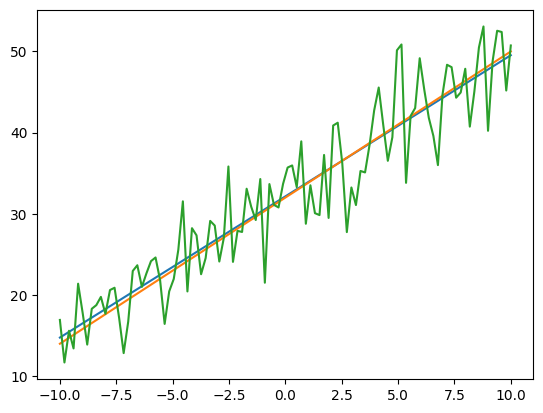

In [121]:
pred1 = linear(x, w_n1, b_n1)
print(w_n1, b_n1)
plt.plot(x, pred1, x, y_ideal, x, y_noise)

### With Autograd (optimizer X)

tensor([ 1.7389, 32.2264], requires_grad=True)


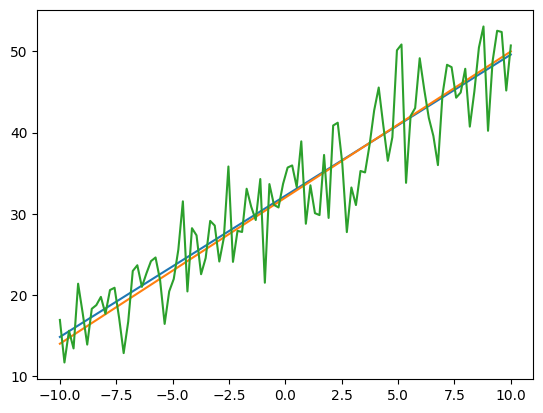

In [122]:
pred2 = linear(x, *params1)
print(params1)
plt.plot(x, pred2.detach(), x, y_ideal, x, y_noise)

### with AutoGrad (optimizer O)

tensor([ 1.7389, 32.2270], requires_grad=True)


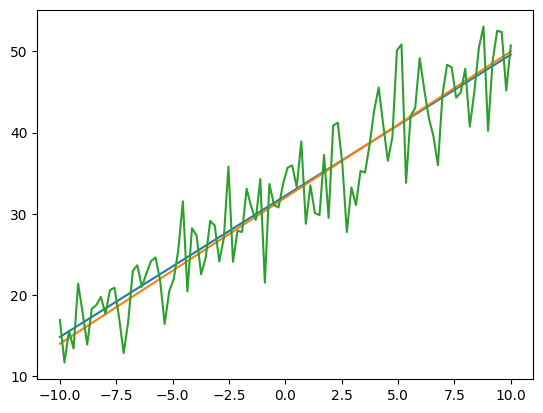

In [127]:
pred3 = linear(x, *params2)
print(params2)
plt.plot(x, pred3.detach(), x, y_ideal, x, y_noise)

Parameter containing:
tensor([[1.7389]], requires_grad=True) Parameter containing:
tensor([32.2264], requires_grad=True)


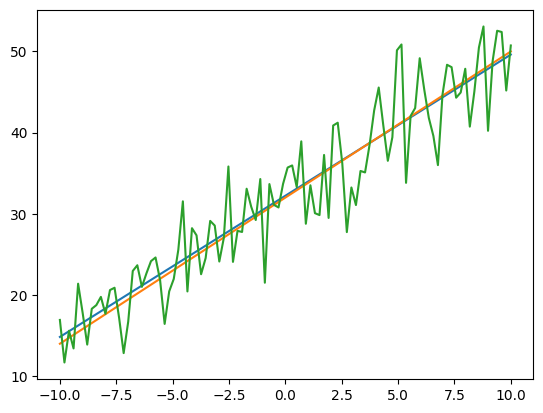

In [126]:
pred4 = model(x)
print(model.l0.weight, model.l0.bias)
plt.plot(x, pred4.detach(), x, y_ideal, x, y_noise)